# Performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function

In [4]:
import math
import pandas as pd
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [5]:
def train_validate_split(df,test_size):
    if isinstance(test_size,float):
        test_size = round(test_size*len(df))
        
    indices=df.index.tolist()
    validate_indices = random.sample(population=indices,k=test_size)
    
    validate_df=df.loc[validate_indices]
    train_df=df.drop(validate_indices)
#     print(train_df,validate_df)
    return train_df,validate_df

In [6]:
def predict(data,theta):
#     print(data.shape,theta.shape)
    predicted=np.matmul(data,theta)
    return predicted

In [43]:
def main(test_file):
    df=pd.read_csv("AdmissionDataset/data.csv")
    del df['Serial No.']
    
#     random.seed(0)
    training_df,validation_df=train_validate_split(df,.2)
    training_data=training_df.values
    label_train=training_data[:,-1]
    training_data=training_data[:,:-1]
    
#     print(training_data)
    length=len(training_data)
    training_data=training_data.transpose()
    a=np.ones(length)
    training_data=np.insert(training_data, 0,a,0)
#     print(training_data)

    
    training_data=training_data.transpose()
    training_data_traspose=training_data.transpose()
#     print(label_train.shape)
#     print(training_data.shape,training_data_traspose.shape)
    
    one=np.matmul(training_data_traspose, training_data)
    two=np.linalg.inv(one)
    three=np.matmul(two,training_data_traspose)
    theta=np.matmul(three,label_train)
#     print(theta)
    
#     df_test=pd.read_csv("AdmissionDataset/data.csv")
#     del df['Serial No.']
#     validation_data=df_test.values

    validation_data=validation_df.values
    label_validate=validation_data[:,-1]
    validation_data=validation_data[:,:-1]
    
    length2=len(validation_data)
    validation_data=validation_data.transpose()
#     print(training_data)
    b=np.ones(length2)
    validation_data=np.insert(validation_data, 0,b,0)
    validation_data=validation_data.transpose()
#     print(validation_data.shape)

#     theta_tra=theta.transpose()
    predicted=predict(validation_data,theta)
#     print(predicted.shape,label_validate.shape)
    diff=predicted-label_validate
    feature_one=validation_data[:,6]
    xis=[]
    for i in range(len(diff)):
        xis.append(diff[i])
    yis=[]
    for i in range(len(validation_data)):
        yis.append(feature_one[i])
    x = yis
    y = xis
#     print(x,y)
    plt.xlabel("CGPA")
    plt.ylabel("residue")
#     plt.title('Robot 1')
#     colors = np.random.rand(5)
#     area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

    plt.scatter(x,y)
    plt.show()

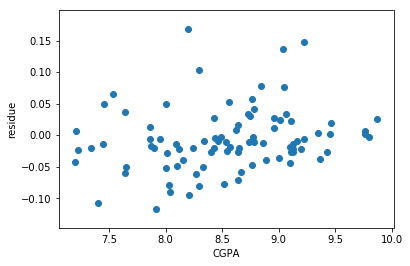

In [44]:
test_file=[]
main(test_file)